In [1]:
!pip install statsmodels

---
# Sentiment Analysis - Airline Passenger Satisfaction
---

# Exploration des données
---

In [2]:
# Import des données à partir d'un fichier CSV distant à l'aide de pandas
import pandas as pd
url = "https://raw.githubusercontent.com/remijul/dataset/master/Airline%20Passenger%20Satisfaction.csv"
df = pd.read_csv(url, delimiter=';')
# Affichage des cinq premières lignes du DataFrame
df.head()

,id,Satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [3]:
# Affichage des dimensions du DataFrame
df.shape

(129880, 24)

In [4]:
# Affichage des types de données de chaque colonne du DataFrame
df.dtypes

id                                     int64
Satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure 

In [5]:
# Affichage d'un résumé statistique des variables numériques du DataFrame
df.describe()

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,37493.270818,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,1.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,97410.250000,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [6]:
# Comptage du nombre de valeurs manquantes pour chaque variable du DataFrame
df.isnull().sum()

id                                     0
Satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [7]:
# Boucle parcourant les noms de colonnes du DataFrame et affichant le nombre de valeurs uniques pour chaque colonne
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

id: 129880
Satisfaction: 2
Gender: 2
Customer Type: 2
Age: 75
Type of Travel: 2
Class: 3
Flight Distance: 5398
Seat comfort: 6
Departure/Arrival time convenient: 6
Food and drink: 6
Gate location: 6
Inflight wifi service: 6
Inflight entertainment: 6
Online support: 6
Ease of Online booking: 6
On-board service: 6
Leg room service: 6
Baggage handling: 5
Checkin service: 6
Cleanliness: 6
Online boarding: 6
Departure Delay in Minutes: 466
Arrival Delay in Minutes: 472


C:\Users\loren\AppData\Local\Temp\ipykernel_15020\2199578633.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


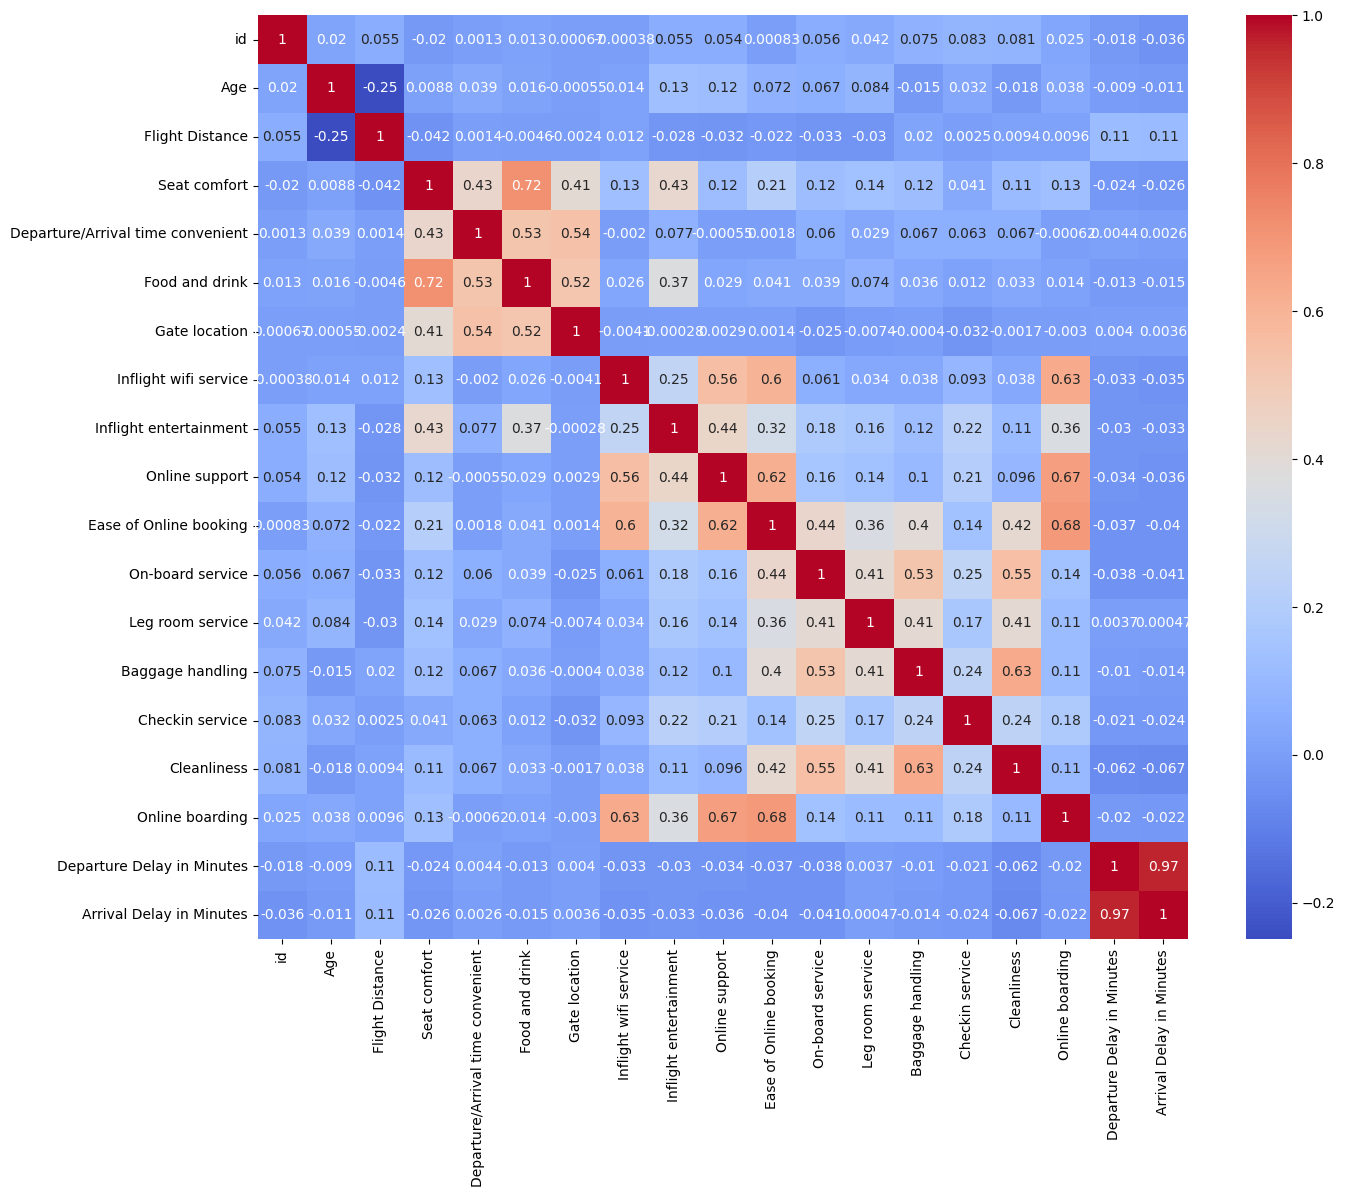

In [8]:
# Importation des bibliothèques de visualisation de données
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation entre les variables du DataFrame
corr_matrix = df.corr()

# Création d'une figure de taille 15x12 pouces et affichage d'une heatmap de la matrice de corrélation
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Affichage de la figure
plt.show()

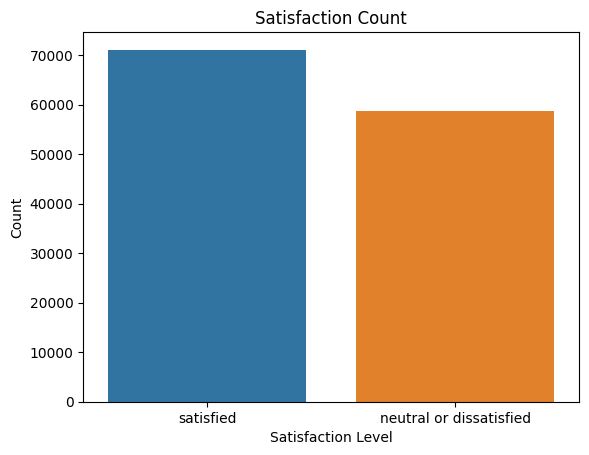

In [9]:
# Diagramme à barres pour montrer le nombre de chaque niveau de satisfaction.
sns.countplot(x='Satisfaction', data=df)
plt.title('Satisfaction Count')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.show()

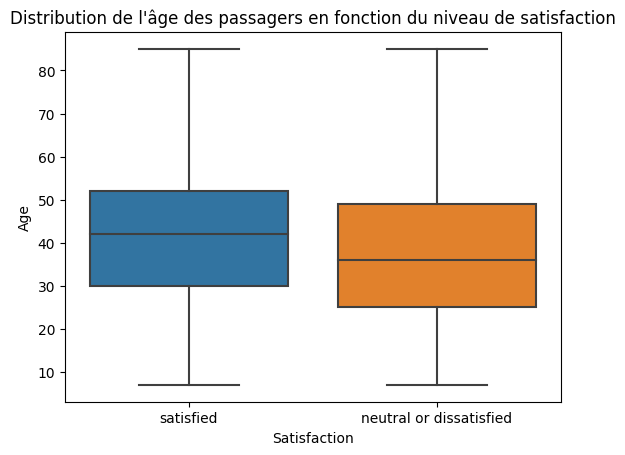

In [10]:
# Distribution de l'âge des passagers en fonction du niveau de satisfaction
sns.boxplot(x='Satisfaction', y='Age', data=df)
plt.title("Distribution de l'âge des passagers en fonction du niveau de satisfaction")
plt.show()

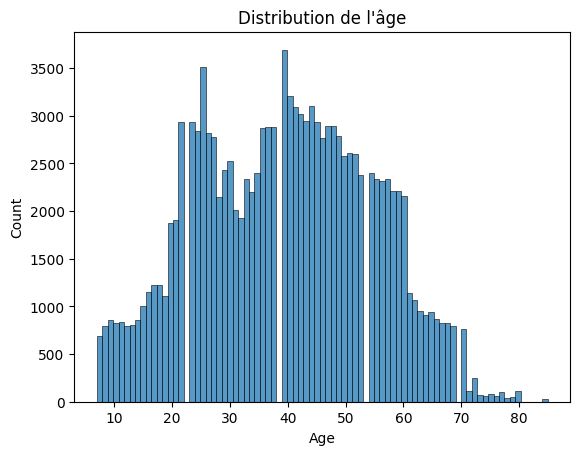

In [11]:
# Histogramme pour montrer la distribution de l'âge
sns.histplot(x='Age', data=df)
plt.title("Distribution de l'âge")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

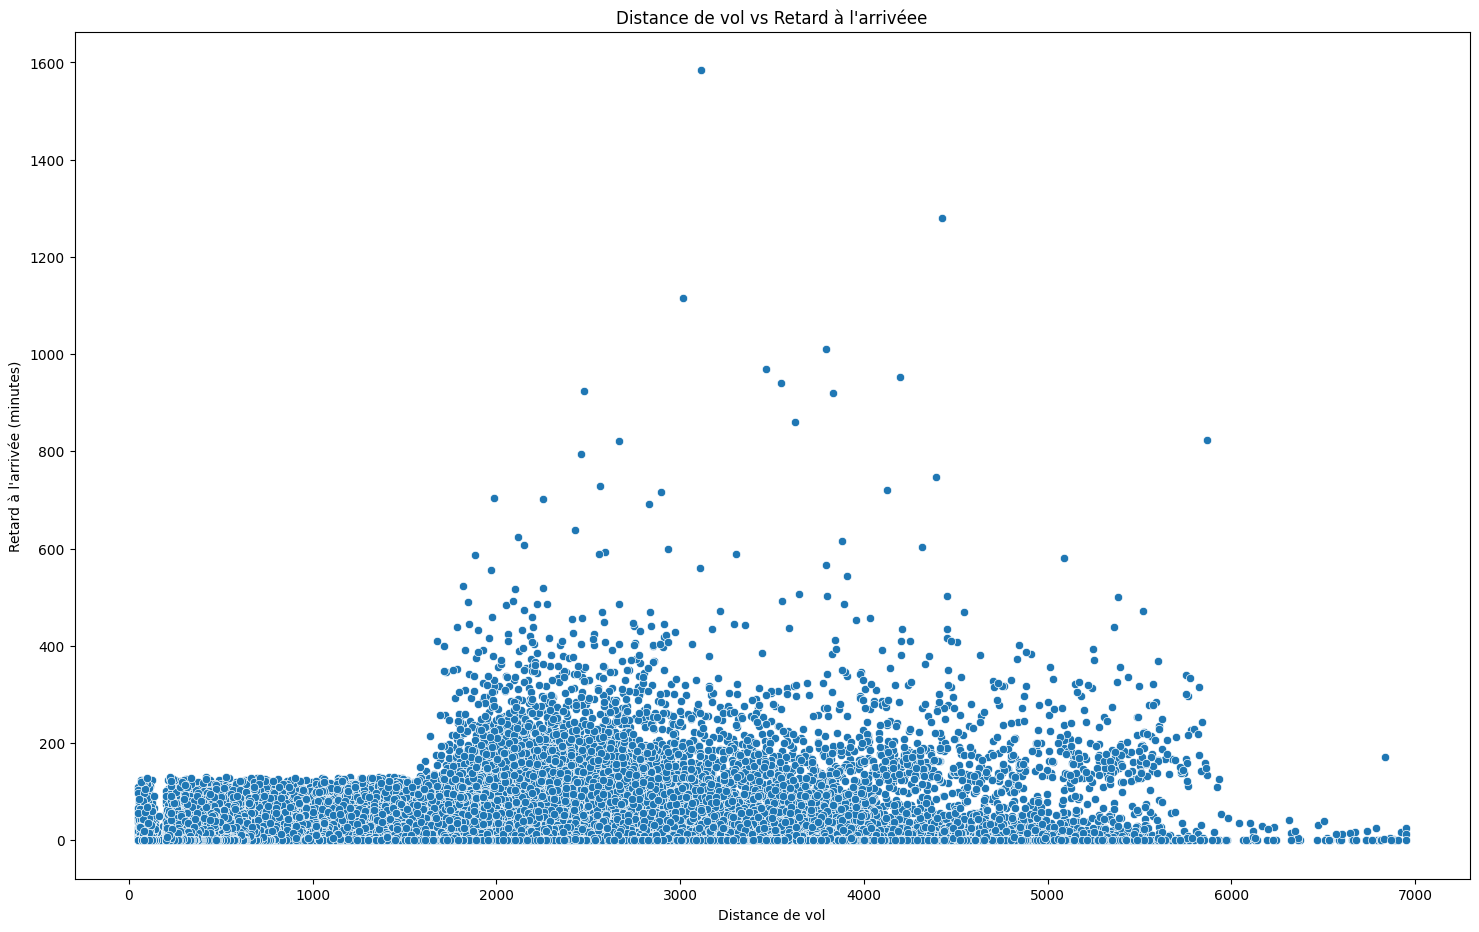

In [12]:
# Nuage de points pour montrer la relation entre la distance de vol et le retard à l'arrivée
plt.figure(figsize=(18, 11))

sns.scatterplot(x='Flight Distance', y='Arrival Delay in Minutes', data=df)

plt.title("Distance de vol vs Retard à l'arrivéee")
plt.xlabel('Distance de vol')
plt.ylabel("Retard à l'arrivée (minutes)")
plt.show()

---
# ANOVA
---

In [13]:
import pandas as pd
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

url = "https://raw.githubusercontent.com/remijul/dataset/master/Airline%20Passenger%20Satisfaction.csv"
df = pd.read_csv(url, delimiter=';')

# Convertion des variables catégorielles en variables numériques à l'aide d'un one-hot encoding
cat_vars = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
onehot = OneHotEncoder(sparse=False)
cat_data = onehot.fit_transform(df[cat_vars])
cat_df = pd.DataFrame(cat_data, columns=onehot.get_feature_names_out(cat_vars))

# Join des données numériques et catégorielles
num_vars = ['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
            'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment',
            'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service',
            'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
            'Departure Delay in Minutes', 'Arrival Delay in Minutes']

df_processed = pd.concat([df[num_vars], cat_df, df['Satisfaction']], axis=1)

# Remplacement des espaces par des traits de soulignement dans les noms de colonnes
df_processed.columns = df_processed.columns.str.replace(' ', '_')

# Convertion de satisfaction en variable binaire
df_processed['Satisfaction'] = df_processed['Satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

# Fit du modèle avec ANOVA
model = ols('Satisfaction ~ Age + Gender_Female + Gender_Male + Type_of_Travel_Business_travel + Type_of_Travel_Personal_Travel + Class_Business + Class_Eco + Class_Eco_Plus + Flight_Distance + Seat_comfort', data=df_processed)
entrainement = model.fit()
anova_results = anova_lm(entrainement)
anova_results

c:\Users\loren\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,df,sum_sq,mean_sq,F,PR(>F)
Age,1.0,447.844322,447.844322,2297.071243,0.000000e+00
Gender_Female,1.0,1464.128798,1464.128798,7509.770680,0.000000e+00
Gender_Male,1.0,0.029611,0.029611,0.151878,6.967477e-01
Type_of_Travel_Business_travel,1.0,334.468588,334.468588,1715.547431,0.000000e+00
Type_of_Travel_Personal_Travel,1.0,0.087643,0.087643,0.449537,5.025559e-01
Class_Business,1.0,2749.254370,2749.254370,14101.402753,0.000000e+00
Class_Eco,1.0,9.311677,9.311677,47.761207,4.836307e-12
Class_Eco_Plus,1.0,0.043316,0.043316,0.222177,6.373870e-01
Flight_Distance,1.0,62.370654,62.370654,319.909906,1.847045e-71
Seat_comfort,1.0,1792.009374,1792.009374,9191.527052,0.000000e+00


## D'après les résultats, l'âge, le genre_femme, le type de voyage_professionnel, la classe professionnelle et le confort du siège ont des valeurs p très faibles (proches de 0), ce qui indique qu'ils sont associés de manière significative à la variable "satisfaction". En revanche, les variables telles que Sexe_Homme, Type_de_voyage_Personnel et Classe_Eco_Plus ont des valeurs p plus élevées, ce qui suggère qu'elles ne sont peut-être pas associées de manière significative à la variable Satisfaction.

---
# Chi2
---

In [14]:
import pandas as pd
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder

url = "https://raw.githubusercontent.com/remijul/dataset/master/Airline%20Passenger%20Satisfaction.csv"
df = pd.read_csv(url, delimiter=';')

cat_vars = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
onehot = OneHotEncoder(sparse=False)
cat_data = onehot.fit_transform(df[cat_vars])
cat_df = pd.DataFrame(cat_data, columns=onehot.get_feature_names_out(cat_vars))

# Convertion de la variable cible au format binaire
df['Satisfaction_binary'] = (df['Satisfaction'] == 'satisfied').astype(int)

# Pour obtenir les noms de variables encodés
encoded_vars = onehot.get_feature_names_out(cat_vars)

# Test du chi2 pour vérifier l'indépendance entre les variables catégorielles et la variable cible
for var in cat_vars:
    encoded_vars_for_var = [v for v in encoded_vars if v.startswith(var)]
    for encoded_var in encoded_vars_for_var:
        table = pd.crosstab(cat_df[encoded_var], df['Satisfaction_binary'])
        _, p, _, _ = stats.chi2_contingency(table)
        print(f"Test du Chi-carré pour l'indépendance entre {encoded_var} et la satisfaction:\n"
        f"\tValeur-P: {p:.4f}")

c:\Users\loren\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Test du Chi-carré pour l'indépendance entre Gender_Female et la satisfaction:
	Valeur-P: 0.0000
Test du Chi-carré pour l'indépendance entre Gender_Male et la satisfaction:
	Valeur-P: 0.0000
Test du Chi-carré pour l'indépendance entre Customer Type_Loyal Customer et la satisfaction:
	Valeur-P: 0.0000
Test du Chi-carré pour l'indépendance entre Customer Type_disloyal Customer et la satisfaction:
	Valeur-P: 0.0000
Test du Chi-carré pour l'indépendance entre Type of Travel_Business travel et la satisfaction:
	Valeur-P: 0.0000
Test du Chi-carré pour l'indépendance entre Type of Travel_Personal Travel et la satisfaction:
	Valeur-P: 0.0000
Test du Chi-carré pour l'indépendance entre Class_Business et la satisfaction:
	Valeur-P: 0.0000
Test du Chi-carré pour l'indépendance entre Class_Eco et la satisfaction:
	Valeur-P: 0.0000
Test du Chi-carré pour l'indépendance entre Class_Eco Plus et la satisfaction:
	Valeur-P: 0.0000


## Les résultats du test montrent qu'il existe une relation statistiquement significative entre chaque niveau des variables catégorielles (sexe, type de client, type de voyage et classe) et la variable cible (satisfaction). Les valeurs p sont toutes extrêmement faibles (0,0000), ce qui indique que les relations sont hautement significatives et ne sont pas dues au hasard.

---
# Preprocessing 

---


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [16]:
# Rechargement des données
data = pd.read_csv(url, delimiter=';')

# Suppression des Na
data.dropna(inplace=True)

# Imputation par la médiane
# data.fillna(data.median(), inplace=True)

# Imputation par la moyenne :
# data.fillna(data.mean(), inplace=True)

# Convertion des colonnes catégorielles en type "category"
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
data[categorical_columns] = data[categorical_columns].astype('category')

# Map de la colonne 'Satisfaction' en valeurs numériques pour la prédiction
data['Satisfaction'] = data['Satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})
X = data.drop('Satisfaction', axis=1)
y = data['Satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_columns = ['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Transformer pour les colonnes numériques et catégorielles
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Préprocessing qui applique les transformations appropriées aux colonnes correspondantes
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_columns),
    ('cat', categorical_transformer, categorical_columns)
])

# Création pipeline qui inclut le préprocessing et un classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

---
# Pipeline

---


In [17]:
# Création pipeline qui inclut le préprocessing et un classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

---
# Entraînement

---

In [18]:
# Entraînement
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Flight Distance',
                                                   'Seat comfort',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Food and drink',
                                                   'Gate location',
                                                   'Inflight wifi service',
                                                   'Inflight entertainment',
                                                   'Online support',
                                                   'Ease of Online booking',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Cleanliness',
                                                   'Online boarding',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in Minutes']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel',
                                                   'Class'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

---
# Prédiction

---

In [19]:
# Prédiction de la satisfaction des passagers sur les données de test
y_pred = pipeline.predict(X_test)

---
# Performance du random forest

---

In [20]:
# Calcul de la précision et rapport de classification
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     11821
           1       0.97      0.96      0.96     14077

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



---
# GridSearch et autres modèles

---

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Liste des modèles à comparer
models = [
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('LogisticRegression', LogisticRegression(random_state=42)),
    ('SVC', SVC(random_state=42))
]

# Paramètres de recherche pour GridSearchCV pour chaque modèle
model_params = {
    'RandomForest': {
        'classifier__n_estimators': list(range(10, 61, 10)),
        'classifier__max_depth': [None,10, 20, 30]
    },
    'LogisticRegression': {
        'classifier__C': [1]
    },
    'SVC': {
        'classifier__C': [1]
    }
}

# Métrique d'erreur
scoring = 'accuracy'

In [22]:
from sklearn.model_selection import train_test_split

# Échantillon aléatoire de 10000 observations pour entrainer les modèles
X_train_sampled, _, y_train_sampled, _ = train_test_split(X_train, y_train, train_size=10000, stratify=y_train, random_state=42)

best_score = 0
best_model = None
best_params = None

for model_name, model in models:
    print(f"Training {model_name}...")

    # Mise à jour du pipeline avec le modèle en cours
    pipeline.steps[-1] = ('classifier', model)

    # Création de GridSearchCV avec les paramètres spécifiques au modèle en cours
    grid_search = GridSearchCV(pipeline, param_grid=model_params[model_name], cv=5, scoring=scoring)

    # Exécution de GridSearchCV sur l'échantillon de données d'apprentissage
    grid_search.fit(X_train_sampled, y_train_sampled)

    # Comparaison des scores pour sélectionner le meilleur modèle
    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_model = model_name
        best_params = grid_search.best_params_

# Affichage du meilleur modèle et de ses paramètres
print(f"Best model: {best_model} with accuracy {best_score:.2f}")
print(f"Best parameters: {best_params}")

# Mise à jour du pipeline avec le meilleur modèle et ses paramètres
pipeline.steps[-1] = ('classifier', dict(models)[best_model])
pipeline.set_params(**best_params)

# Entraînement du meilleur modèle sur l'ensemble des données d'apprentissage
pipeline.fit(X_train, y_train)

# Prédiction de la satisfaction des passagers sur les données de test
y_pred = pipeline.predict(X_test)

# Calcul de la précision et rapport de classification
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Training RandomForest...
Training LogisticRegression...
Training SVC...
Best model: RandomForest with accuracy 0.94
Best parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 60}
Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     11821
           1       0.97      0.96      0.96     14077

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



# Échantillon sur 10000
# Ici on test l'entrainement de plusieurs modèles sur un echantillon puis on garde le meilleur modèle et on l'entraine sur l'ensemble des donneés

## Les résultats montrent que le modèle Random Forest a donné la meilleure précision avec une précision de 0,94 et les paramètres "max_depth" égale à None et "n_estimators" égale à 60. Cela signifie que ce modèle est le plus efficace pour prédire la satisfaction des passagers sur les données de test. La précision globale du modèle est de 0,96, ce qui signifie qu'il prédit correctement la satisfaction des passagers dans 96% des cas. Le rapport de classification montre que le modèle est performant dans la prédiction de la satisfaction des passagers avec des scores de précision, de rappel et de f1-score supérieurs à 0,95 pour chaque classe. Ces résultats suggèrent que le modèle est fiable pour prédire la satisfaction des passagers à partir des données fournies.

---
# Enregistrement du meilleur modèle
---

In [23]:
import joblib

# Enregistre le meilleur modèle avec joblib
joblib.dump(pipeline, 'best_model.joblib')

['best_model.joblib']

---
# Analyse du modèle
---

---
# Features importances
---

In [24]:
import joblib

# Load le model
best_model = joblib.load('best_model.joblib')

# Récupération du modèle RandomForest dans la pipeline
rf_model = best_model.named_steps['classifier']

# Récupération des feature importances
feature_importances = rf_model.feature_importances_

# Récupération feature names depuis one-hot encoder sauf Satisfaction
feature_names = list(df_processed.drop('Satisfaction', axis=1).columns)

# Fusion des feature importances et du noms des colonnes, puis les trier par importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Affichage du résultat
print(feature_importance_df)

                              Feature  Importance
7              Inflight_entertainment    0.190922
2                        Seat_comfort    0.133306
9              Ease_of_Online_booking    0.081098
8                      Online_support    0.063117
10                   On-board_service    0.040387
4                      Food_and_drink    0.039299
11                   Leg_room_service    0.033186
1                     Flight_Distance    0.031343
20       Customer_Type_Loyal_Customer    0.030109
15                    Online_boarding    0.030096
24                     Class_Business    0.029292
0                                 Age    0.028725
13                    Checkin_service    0.025955
12                   Baggage_handling    0.025133
21    Customer_Type_disloyal_Customer    0.023526
19                        Gender_Male    0.022258
18                      Gender_Female    0.021669
14                        Cleanliness    0.021363
3   Departure/Arrival_time_convenient    0.020152


In [25]:
# Même chose avec un graph 

import plotly.express as px

fig = px.bar(feature_importance_df, x='Feature', y='Importance', title='Feature Importances', text='Importance')

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()

---
# Matrice de confusion
---

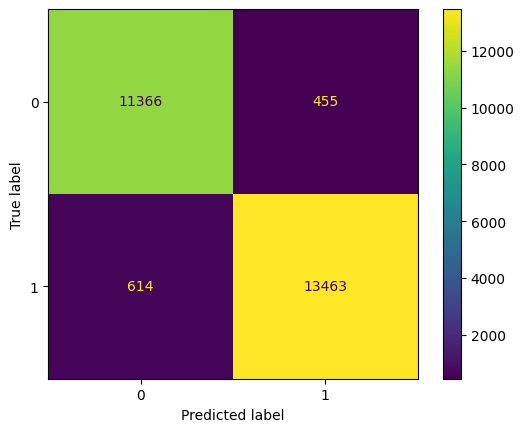

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.named_steps['classifier'].classes_)
disp.plot()

### La matrice de confusion permet d'évaluer les performances du modèle en montrant le nombre de prédictions correctes et incorrectes pour chaque classe. Dans notre cas, la matrice de confusion est la suivante et peut être interprétée comme suit :

### 11 366 passagers insatisfaits ont été correctement classés par le modèle (vrais négatifs).
### 455 passagers insatisfaits ont été incorrectement classés comme satisfaits (faux positifs).
### 614 passagers satisfaits ont été incorrectement classés comme insatisfaits (faux négatifs).
### 13 463 passagers satisfaits ont été correctement classés par le modèle (vrais positifs).
# Dans l'ensemble, le modèle semble être performant, car la majorité des prédictions sont correctes. Cependant, il y a encore des erreurs, notamment 455 faux positifs et 614 faux négatifs.

---
# Courbe de ROC
---

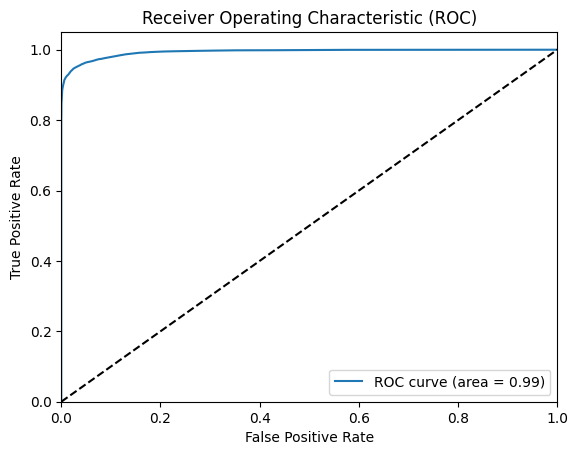

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Prédiction des probabilités pour l'ensemble de test
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calcul du taux de faux positifs (FPR), du taux de vrais positifs (TPR) et du score ROC AUC.
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot du ROC
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


### Les résultats montrent les taux de faux positifs (FPR), les taux de vrais positifs (TPR) et le score ROC AUC du modèle.

### Le score ROC AUC est de 0.9936, ce qui est très proche de 1. Cela indique que le modèle est très performant pour distinguer les deux classes. Un score ROC AUC élevé signifie que le modèle est capable de classer correctement les vrais positifs et les vrais négatifs avec une grande précision.

### En observant les taux de faux positifs et les taux de vrais positifs, on peut voir que le modèle parvient à atteindre un taux de vrais positifs élevé tout en maintenant un faible taux de faux positifs pour la plupart des seuils. Cela confirme que le modèle est performant pour la classification des données test.

# En conclusion, le modèle semble être un excellent classificateur pour le problème donné, avec une performance de classification élevée reflétée par un score ROC AUC proche de 1.

---
# Cross validation
---

In [28]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print("Scores cross-validation :", scores)
print("Moyenne score cross-validation :", scores.mean())
print("Écart-type des scores validés par croisement :", scores.std())


Scores cross-validation : [0.9551115  0.95776619 0.95482189 0.95626991 0.95646088]
Moyenne score cross-validation : 0.9560860745330393
Écart-type des scores validés par croisement : 0.0010530931948875793


### Les résultats montrent les scores de validation croisée pour le modèle en utilisant une validation croisée à 5 plis (cv=5) et le score d'exactitude comme mesure de performance. La validation croisée est une technique utilisée pour évaluer la performance d'un modèle sur différentes parties des données d'apprentissage. Cela permet d'avoir une meilleure estimation de la performance du modèle sur de nouvelles données.

### Le score moyen de validation croisée est de 0.9561, et l'écart-type des scores de validation croisée est de 0.00105. Un score moyen élevé et un faible écart-type indiquent que le modèle est performant et stable sur différents sous-ensembles des données d'entraînement.

# En conclusion, le modèle démontre une performance élevée et une stabilité lors de la validation croisée, ce qui suggère qu'il devrait également bien fonctionner sur des données inédites. L'exactitude moyenne de 0.9561 et l'écart-type faible de 0.00105 confirment que le modèle est un bon classificateur pour le problème donné.

---
# Courbe d'apprentissage
--- 

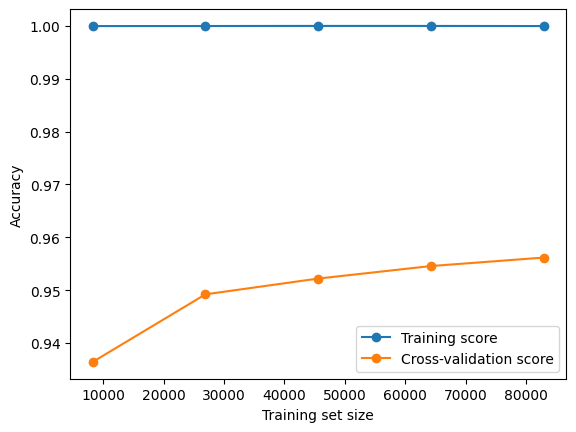

In [29]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5)

plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label='Cross-validation score')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### Les résultats présentés sont issus de la courbe d'apprentissage, qui montre comment la performance du modèle évolue avec la taille de l'ensemble d'entraînement.

### Les scores d'entraînement moyens sont très proches de 1 et restent stables à mesure que la taille de l'ensemble d'entraînement augmente, ce qui indique que le modèle est capable de bien s'adapter aux données d'entraînement. Les écarts-types des scores d'entraînement sont également très faibles, ce qui signifie que les performances sont cohérentes sur les différentes partitions de l'ensemble d'entraînement.

### Les scores moyens de validation croisée augmentent légèrement avec la taille de l'ensemble d'entraînement. Cela suggère que le modèle généralise mieux aux données de validation lorsque davantage de données d'entraînement sont utilisées. Les écarts-types des scores de validation croisée sont faibles, indiquant une stabilité des performances du modèle sur les différentes partitions de validation croisée.

## En conclusion, la courbe d'apprentissage montre que le modèle est performant et stable à mesure que la taille de l'ensemble d'entraînement augmente. Les scores d'entraînement élevés et les faibles écarts-types montrent que le modèle s'adapte bien aux données d'entraînement. Les scores de validation croisée en augmentation et les faibles écarts-types indiquent également que le modèle généralise de manière efficace aux données de validation. Cela suggère que le modèle est un bon classificateur pour le problème donné et devrait bien fonctionner sur de nouvelles données.

---
# Prédiction sur de nouvelles données
---

In [30]:
import joblib

# Charger le modèle entraîné
best_model = joblib.load('best_model.joblib')

# Récupérer les noms des features utilisées dans le preprocessor
feature_names = preprocessor.get_feature_names_out()

# Afficher les noms des features
feature_names

array(['num__Age', 'num__Flight Distance', 'num__Seat comfort',
       'num__Departure/Arrival time convenient', 'num__Food and drink',
       'num__Gate location', 'num__Inflight wifi service',
       'num__Inflight entertainment', 'num__Online support',
       'num__Ease of Online booking', 'num__On-board service',
       'num__Leg room service', 'num__Baggage handling',
       'num__Checkin service', 'num__Cleanliness', 'num__Online boarding',
       'num__Departure Delay in Minutes', 'num__Arrival Delay in Minutes',
       'cat__Gender_Female', 'cat__Gender_Male',
       'cat__Customer Type_Loyal Customer',
       'cat__Customer Type_disloyal Customer',
       'cat__Type of Travel_Business travel',
       'cat__Type of Travel_Personal Travel', 'cat__Class_Business',
       'cat__Class_Eco', 'cat__Class_Eco Plus'], dtype=object)

In [31]:
import joblib
import pandas as pd

# Charger le modèle entraîné
best_model = joblib.load('best_model.joblib')

# Créer un DataFrame avec de nouvelles données
df = pd.DataFrame({
    'Gender': ['Female'],
    'Customer Type': ['Loyal Customer'],
    'Age': [30],
    'Type of Travel': ['Business travel'],
    'Class': ['Business'],
    'Flight Distance': [2000],
    'Seat comfort': [5],
    'Departure/Arrival time convenient': [5],
    'Food and drink': [4],
    'Gate location': [3],
    'Inflight wifi service': [4],
    'Inflight entertainment': [4],
    'Online support': [4],
    'Ease of Online booking': [5],
    'On-board service': [4],
    'Leg room service': [4],
    'Baggage handling': [4],
    'Checkin service': [4],
    'Cleanliness': [4],
    'Online boarding': [4],
    'Departure Delay in Minutes': [10],
    'Arrival Delay in Minutes': [20]
}, index=[0])

# Convertir les colonnes catégorielles en type 'category'
categorical_col = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
df[categorical_col] = df[categorical_col].astype('category')

# Faire des prédictions avec le modèle
predictions = best_model.predict(df)
print(predictions)

[1]


# Ici le client sera satisfait d'après le modèle 

In [32]:
import joblib
import pandas as pd

# Charger le modèle entraîné
best_model = joblib.load('best_model.joblib')

# Créer un DataFrame avec de nouvelles données
df = pd.DataFrame({
    'Gender': ['Female'],
    'Customer Type': ['Loyal Customer'],
    'Age': [30],
    'Type of Travel': ['Business travel'],
    'Class': ['Business'],
    'Flight Distance': [2000],
    'Seat comfort': [1],
    'Departure/Arrival time convenient': [1],
    'Food and drink': [1],
    'Gate location': [1],
    'Inflight wifi service': [1],
    'Inflight entertainment': [0],
    'Online support': [1],
    'Ease of Online booking': [1],
    'On-board service': [1],
    'Leg room service': [1],
    'Baggage handling': [1],
    'Checkin service': [1],
    'Cleanliness': [1],
    'Online boarding': [1],
    'Departure Delay in Minutes': [10],
    'Arrival Delay in Minutes': [20]
}, index=[0])

# Convertir les colonnes catégorielles en type 'category'
categorical_col = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
df[categorical_col] = df[categorical_col].astype('category')

# Faire des prédictions avec le modèle
predictions = best_model.predict(df)
print(predictions)

[0]


# Ici le client ne sera pas satisfait d'après le modèle 

---
# Deep Learning
---

In [ ]:
!pip install tensorflow

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Import des données
url = "https://raw.githubusercontent.com/remijul/dataset/master/Airline%20Passenger%20Satisfaction.csv"
data = pd.read_csv(url, delimiter=';')

# Préparation des données
X = data.drop(columns=['Satisfaction'])
y = data['Satisfaction']

# Encoder les variables catégorielles
le = LabelEncoder()
X = X.apply(le.fit_transform)
y = le.fit_transform(y)

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Création du modèle
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Évaluation du modèle
_, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")


Epoch 1/10
2598/2598 [==============================] - 5s 1ms/step - loss: 0.2474 - accuracy: 0.8946 - val_loss: 0.1890 - val_accuracy: 0.9208
Epoch 2/10
2598/2598 [==============================] - 4s 1ms/step - loss: 0.1783 - accuracy: 0.9262 - val_loss: 0.1673 - val_accuracy: 0.9301
Epoch 3/10
2598/2598 [==============================] - 4s 1ms/step - loss: 0.1596 - accuracy: 0.9329 - val_loss: 0.1567 - val_accuracy: 0.9342
Epoch 4/10
2598/2598 [==============================] - 3s 1ms/step - loss: 0.1478 - accuracy: 0.9381 - val_loss: 0.1427 - val_accuracy: 0.9400
Epoch 5/10
2598/2598 [==============================] - 3s 1ms/step - loss: 0.1397 - accuracy: 0.9407 - val_loss: 0.1357 - val_accuracy: 0.9417
Epoch 6/10
2598/2598 [==============================] - 3s 1ms/step - loss: 0.1337 - accuracy: 0.9426 - val_loss: 0.1337 - val_accuracy: 0.9433
Epoch 7/10
2598/2598 [==============================] - 3s 1ms/step - loss: 0.1291 - accuracy: 0.9448 - val_loss: 0.1291 - val_accuracy:

Epoch 1/10
2598/2598 [==============================] - 4s 1ms/step - loss: 0.1190 - accuracy: 0.9479 - val_loss: 0.1226 - val_accuracy: 0.9470
Epoch 2/10
2598/2598 [==============================] - 3s 1ms/step - loss: 0.1174 - accuracy: 0.9491 - val_loss: 0.1212 - val_accuracy: 0.9490
Epoch 3/10
2598/2598 [==============================] - 3s 1ms/step - loss: 0.1158 - accuracy: 0.9496 - val_loss: 0.1211 - val_accuracy: 0.9491
Epoch 4/10
2598/2598 [==============================] - 3s 1ms/step - loss: 0.1147 - accuracy: 0.9497 - val_loss: 0.1197 - val_accuracy: 0.9475
Epoch 5/10
2598/2598 [==============================] - 3s 1ms/step - loss: 0.1137 - accuracy: 0.9501 - val_loss: 0.1179 - val_accuracy: 0.9489
Epoch 6/10
2598/2598 [==============================] - 3s 1ms/step - loss: 0.1127 - accuracy: 0.9509 - val_loss: 0.1187 - val_accuracy: 0.9493
Epoch 7/10
2598/2598 [==============================] - 3s 1ms/step - loss: 0.1115 - accuracy: 0.9512 - val_loss: 0.1232 - val_accuracy:

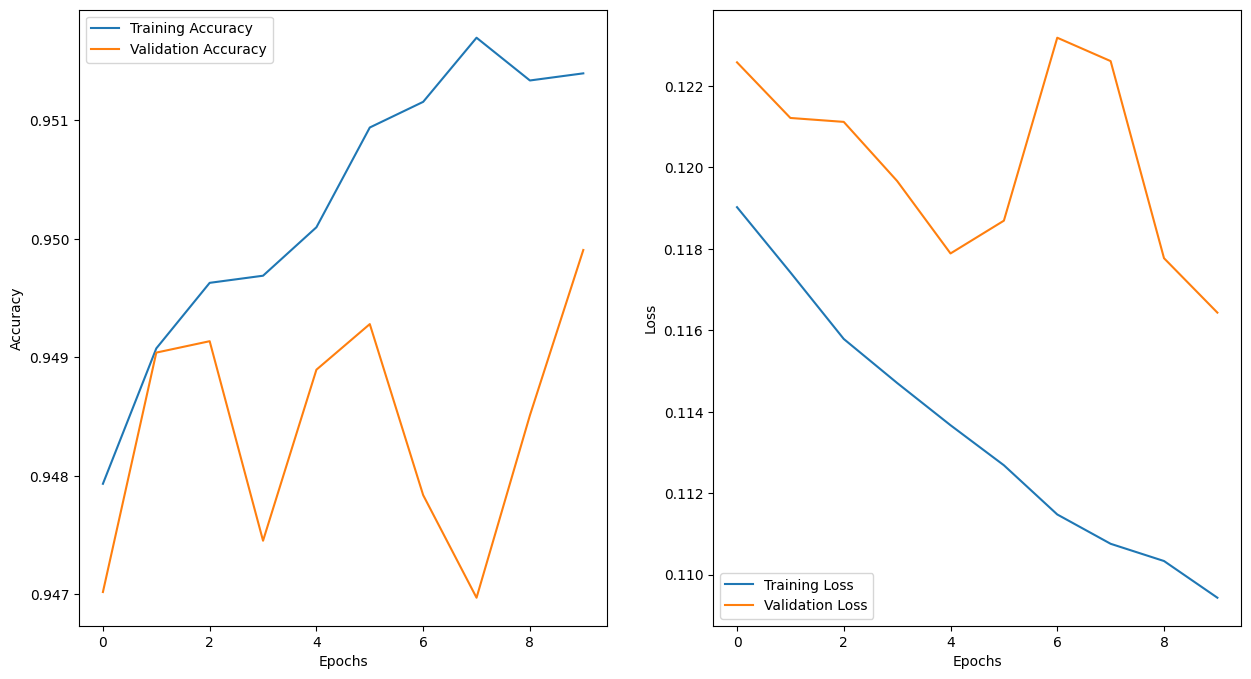

In [38]:
import matplotlib.pyplot as plt

# Entraînement du modèle et récupération de l'historique
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Tracer la courbe de précision
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Tracer la courbe de perte
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

---
# Tensorboard
---

In [39]:
from tensorflow.keras.callbacks import TensorBoard
tensorboard_callback = TensorBoard(log_dir="./logs")
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[tensorboard_callback])

Epoch 1/10
2598/2598 [==============================] - 4s 2ms/step - loss: 0.1087 - accuracy: 0.9519 - val_loss: 0.1171 - val_accuracy: 0.9490
Epoch 2/10
2598/2598 [==============================] - 4s 2ms/step - loss: 0.1083 - accuracy: 0.9518 - val_loss: 0.1164 - val_accuracy: 0.9488
Epoch 3/10
2598/2598 [==============================] - 4s 2ms/step - loss: 0.1076 - accuracy: 0.9528 - val_loss: 0.1165 - val_accuracy: 0.9492
Epoch 4/10
2598/2598 [==============================] - 4s 2ms/step - loss: 0.1070 - accuracy: 0.9531 - val_loss: 0.1150 - val_accuracy: 0.9509
Epoch 5/10
2598/2598 [==============================] - 4s 2ms/step - loss: 0.1062 - accuracy: 0.9537 - val_loss: 0.1161 - val_accuracy: 0.9492
Epoch 6/10
2598/2598 [==============================] - 4s 2ms/step - loss: 0.1063 - accuracy: 0.9532 - val_loss: 0.1142 - val_accuracy: 0.9521
Epoch 7/10
2598/2598 [==============================] - 4s 2ms/step - loss: 0.1057 - accuracy: 0.9537 - val_loss: 0.1173 - val_accuracy:

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                768       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,313
Trainable params: 1,313
Non-trainable params: 0
_________________________________________________________________


---
# VotingClassifier() & StackingClassifier()
---

In [55]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

log_reg = LogisticRegression(max_iter=1000, random_state=42)
tree = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_reg), ('dt', tree), ('rfc', rfc)], voting='soft'
)

stacking_clf = StackingClassifier(
    estimators=[('lr', log_reg), ('dt', tree), ('rfc', rfc)], final_estimator=RandomForestClassifier()
)

In [56]:
import pandas as pd
numerical_columns = ['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']

# Convertion tableaux NumPy en pandas DataFrame
X_train_df = pd.DataFrame(X_train, columns=numerical_columns + categorical_columns)
X_test_df = pd.DataFrame(X_test, columns=numerical_columns + categorical_columns)

print("X_train shape: ", X_train_df.shape)
print("X_test shape: ", X_test_df.shape)
print("Columns in X_test: ", X_test_df.columns)


X_train shape:  (103904, 23)
X_test shape:  (25976, 23)
Columns in X_test:  Index(['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Gender',
       'Customer Type', 'Type of Travel', 'Class', 'Satisfaction'],
      dtype='object')


In [57]:
from sklearn.pipeline import Pipeline

ensemble_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ensemble', voting_clf) # voting_clf
])

ensemble_pipeline.fit(X_train_df, y_train)
y_pred = ensemble_pipeline.predict(X_test_df)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     11675
           1       0.95      0.95      0.95     14301

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



In [58]:
from sklearn.pipeline import Pipeline

ensemble_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ensemble', stacking_clf) # stacking_clf
])

ensemble_pipeline.fit(X_train_df, y_train)
y_pred = ensemble_pipeline.predict(X_test_df)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11675
           1       0.95      0.94      0.94     14301

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



---
# ACP
---

In [67]:
from sklearn.decomposition import PCA

# Rechargement des données
data = pd.read_csv(url, delimiter=';')

# Suppression des Na
data.dropna(inplace=True)

# Imputation par la médiane
# data.fillna(data.median(), inplace=True)

# Imputation par la moyenne :
# data.fillna(data.mean(), inplace=True)

# Convertion des colonnes catégorielles en type "category"
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
data[categorical_columns] = data[categorical_columns].astype('category')

# Map de la colonne 'Satisfaction' en valeurs numériques pour la prédiction
data['Satisfaction'] = data['Satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})
X = data.drop('Satisfaction', axis=1)
y = data['Satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_columns = ['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Transformer pour les colonnes numériques et catégorielles
numerical_transformer = StandardScaler()
numérique_transformer_PCA = Pipeline(steps=[
    ('scaler', numerical_transformer),
    ('pca', PCA(n_components=2))])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Préprocessing qui applique les transformations appropriées aux colonnes correspondantes
preprocessor = ColumnTransformer(transformers=[
    ('num', numérique_transformer_PCA, numerical_columns),
    ('cat', categorical_transformer, categorical_columns)
])

# Création pipeline qui inclut le préprocessing et un classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
# Entraînement
pipeline.fit(X_train, y_train)
# Prédiction de la satisfaction des passagers sur les données de test
y_pred = pipeline.predict(X_test)
# Calcul de la précision et rapport de classification
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.86      0.87      0.86     11821
           1       0.89      0.88      0.89     14077

    accuracy                           0.88     25898
   macro avg       0.87      0.88      0.87     25898
weighted avg       0.88      0.88      0.88     25898

